In [1]:
from tensorflow.keras import backend as K

# Hàm tính RMSE
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV mà bạn đã tải lên
data_file_path = 'data_goc.csv'
data = pd.read_csv(data_file_path)

# Xử lý các cột quan trọng sang dạng số và loại bỏ các ký hiệu
data['priceVnd'] = pd.to_numeric(data['priceVnd'], errors='coerce')
data['areaM2'] = pd.to_numeric(data['areaM2'], errors='coerce')
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['long'] = pd.to_numeric(data['long'], errors='coerce')
data.dropna(subset=['priceVnd', 'areaM2', 'lat', 'long'], inplace=True)

# Chọn các cột đặc trưng (feature columns)
X = data[['areaM2', 'lat', 'long']].values
y = data['priceVnd'].values

# Chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Lấy log của giá trị `y` để làm mượt dữ liệu
y = np.log1p(y)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định dạng dữ liệu cho từng mô hình
X_train_cnn = X_train.reshape((X_train.shape[0], 1, 1, X_train.shape[1]))  # Cho CNN
X_test_cnn = X_test.reshape((X_test.shape[0], 1, 1, X_test.shape[1]))

X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Cho RNN/LSTM
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10804\998185595.py:26: RuntimeWarning: divide by zero encountered in log1p
  y = np.log1p(y)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend as K

# Hàm RMSE
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model_cnn = Sequential()

# Lớp Convolutional và MaxPooling với 100 filters
model_cnn.add(Conv2D(100, (1, 1), activation='relu', input_shape=(1, 1, X_train.shape[1])))
model_cnn.add(MaxPooling2D((1, 1)))

# Các lớp Convolutional tiếp theo
for _ in range(5):
    model_cnn.add(Conv2D(100, (1, 1), activation='relu'))
    model_cnn.add(MaxPooling2D((1, 1)))
    model_cnn.add(Dropout(0.5))

# Lớp Flatten và Dense
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dropout(0.5))

# Lớp đầu ra
model_cnn.add(Dense(1))

# Compile và huấn luyện
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', rmse])
history_cnn = model_cnn.fit(X_train_cnn, y_train, validation_split=0.2, epochs=50, batch_size=32)


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 514ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: nan - mae: nan - rmse: na

In [5]:
from tensorflow.keras.layers import SimpleRNN

model_rnn = Sequential()

# Lớp RNN đầu tiên
model_rnn.add(SimpleRNN(100, input_shape=(1, X_train.shape[1]), return_sequences=True))
model_rnn.add(Dropout(0.5))

# 5 lớp RNN tiếp theo
for _ in range(5):
    model_rnn.add(SimpleRNN(100, return_sequences=True))
    model_rnn.add(Dropout(0.5))

# Lớp đầu ra
model_rnn.add(Dense(1))

# Compile và huấn luyện
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', rmse])
history_rnn = model_rnn.fit(X_train_rnn, y_train, validation_split=0.2, epochs=50, batch_size=32)


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: nan - mae: nan - rmse: nan 

In [ ]:
                        from tensorflow.keras.layers import LSTM

                        model_lstm = Sequential()

                        # Lớp LSTM đầu tiên
                        model_lstm.add(LSTM(100, input_shape=(1, X_train.shape[1]), return_sequences=True))
                        model_lstm.add(Dropout(0.5))

                        # 5 lớp LSTM tiếp theo
                        for _ in range(5):
                            model_lstm.add(LSTM(100, return_sequences=True))
                            model_lstm.add(Dropout(0.5))

                        # Lớp đầu ra
                        model_lstm.add(Dense(1))

                        # Compile và huấn luyện
                        model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', rmse])
                        history_lstm = model_lstm.fit(X_train_rnn, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: nan - mae: nan - rmse: nan

In [7]:
# Đánh giá mô hình CNN
cnn_results = model_cnn.evaluate(X_test_cnn, y_test)
print(f"CNN - MAE: {cnn_results[1]:.4f}, MSE: {cnn_results[0]:.4f}, RMSE: {cnn_results[2]:.4f}")

# Đánh giá mô hình RNN
rnn_results = model_rnn.evaluate(X_test_rnn, y_test)
print(f"RNN - MAE: {rnn_results[1]:.4f}, MSE: {rnn_results[0]:.4f}, RMSE: {rnn_results[2]:.4f}")

# Đánh giá mô hình LSTM
lstm_results = model_lstm.evaluate(X_test_rnn, y_test)
print(f"LSTM - MAE: {lstm_results[1]:.4f}, MSE: {lstm_results[0]:.4f}, RMSE: {lstm_results[2]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: nan - mae: nan - rmse: nan
CNN - MAE: nan, MSE: nan, RMSE: nan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: nan - mae: nan - rmse: nan
RNN - MAE: nan, MSE: nan, RMSE: nan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: nan - mae: nan - rmse: nan
LSTM - MAE: nan, MSE: nan, RMSE: nan


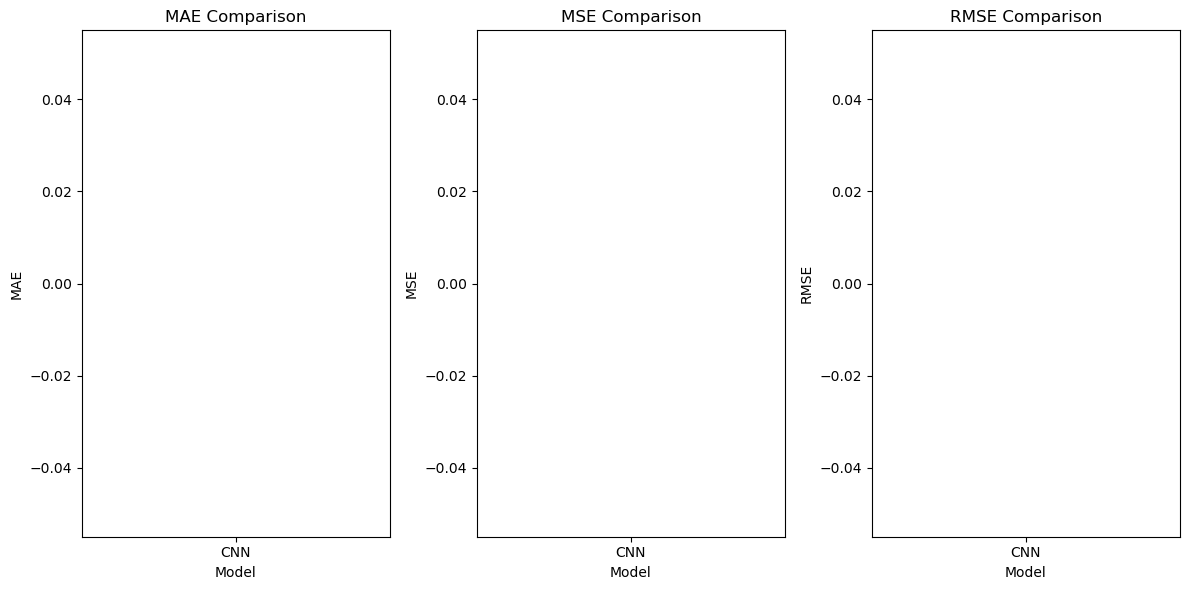

In [8]:
import matplotlib.pyplot as plt

# Tạo dataframe kết quả
results = {
    'Model': ['CNN', 'RNN', 'LSTM'],
    'MAE': [cnn_results[1], rnn_results[1], lstm_results[1]],
    'MSE': [cnn_results[0], rnn_results[0], lstm_results[0]],
    'RMSE': [cnn_results[2], rnn_results[2], lstm_results[2]]
}

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ MAE
plt.subplot(1, 3, 1)
plt.bar(results['Model'], results['MAE'], color='skyblue')
plt.title('MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')

# Biểu đồ MSE
plt.subplot(1, 3, 2)
plt.bar(results['Model'], results['MSE'], color='salmon')
plt.title('MSE Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')

# Biểu đồ RMSE
plt.subplot(1, 3, 3)
plt.bar(results['Model'], results['RMSE'], color='lightgreen')
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()
